### 이미지 로데이터 파일에서 데이터 추출

- [1] 파일 입출력 방식

In [1]:
import os.path

## with open() as ~

file_path = '../data/mnist/t10k-images-idx3-ubyte'

In [2]:
# 파일 읽을때 고려사항 => mode = br : 바이트 읽기 모드
with open(file_path, 'rb') as f:
    all_data = f.read()

In [3]:
print(type(all_data))
print(all_data[:10]) # print문으로 제대로 읽어올 수 없음

<class 'bytes'>
b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00"


In [4]:
with open(file_path, 'rb') as f:
    magic_code = f.read(4)  # seek로 포인터 조절 : 4byte만 읽어옴
    print(magic_code)
    data_length = f.read(4) # 그 다음 포인터부터 4byte 읽어옴
    print(data_length)
    row = f.read(4)
    print(row)
    col = f.read(4)
    print(col)

b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


In [5]:
# 바이트 -> 알아보는 문자로  : type이 문자열
row.hex()

'0000001c'

- [2] 파이썬의 byte 데이터 변환 모듈 활용

In [6]:
### 모듈 로딩
import struct,os

In [7]:
### 데이터 추출 및 저장 관련 변수
### 학습용 : train.csv
### 테스트용 : test.csv
### 위치 : ../data/text/
save_dir = '../data/text/'
data_dir = '../data/mnist/'
train_file = data_dir + 'train.csv'
test_file = data_dir + 'test.csv'

In [8]:
### 사용자 정의 함수
### 기능 : raw data 파일을 읽어서 csv파일로 저장
### 함수명 : to_csv
### 매개변수 : 파일이름, 데이터수
### 반환값 : 파일 생성 여부 True/False

DEBUG = False
# CSV 변환 기능 함수
def to_csv(name, maxdata):
    
    # (1) CSV 저장할 데이터 준비
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open(data_dir+name+"-labels-idx1-ubyte", "rb")
    img_f = open(data_dir+name+"-images-idx3-ubyte", "rb")
    
    # CSV 파일 생성
    csv_f = open(save_dir+name+".csv", "w", encoding="utf-8",newline='')
    
    # 헤더 정보 읽기
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8)) # 매직 코드 + 레이블 갯수
    mag, img_count = struct.unpack(">II", img_f.read(8)) # 매직 코드 + 이미지 갯수
    rows, cols = struct.unpack(">II", img_f.read(8)) # 행, 열 갯수
    pixels = rows * cols
    if DEBUG:
        print('lbl_count {}, img_count {}'.format(lbl_count, img_count))
        print('rows {}, cols {}'.format(rows, cols))
        
    # (2) 이미지 데이터를 읽고 CSV로 저장

    for idx in range(lbl_count):
        if idx > maxdata: break
        
        # 숫자이미지 데이터가 의미하는 숫자값 읽기
        # 튜플타입 리턴 ->1개 데이터 (value,)
        label = struct.unpack("B", lbl_f.read(1))[0]
        if DEBUG: print(' label => {}'.format(label))
        # 이미지 데이터 읽기
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata)) # 문자열로 변환
        if DEBUG: print('sdata => {}'.format(sdata))
        # CSV 파일에 쓰기
        csv_f.write(str(label)+",") # 숫자 라벨 쓰기
        csv_f.write(','.join(sdata) + "\r\n") # 리스트 이미지 데이터->문자열 변환 쓰기
        
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    # 생성된 파일 존재 여부 확인 후 반환
    return os.path.exists(save_dir+f'{name}.csv')  # 반환값 : bool

In [9]:
# 학습용 데이터 파일 생성
to_csv('train',10000)

True

In [10]:
# 테스트용 데이터 파일 생성
to_csv('t10k',10000)

True

- [3] 이미지 데이터 로딩 후 시각화

[3-1] 이미지 데이터 로딩 csv => DataFrame 또는 Numpy

In [11]:
import pandas as pd

In [35]:
trainDF = pd.read_csv('../data/text/train.csv', header=None)
testDF = pd.read_csv('../data/text/t10k.csv', header=None)

In [36]:
trainDF

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# 이미지 데이터와 라벨 분리
labels = trainDF[trainDF.columns[0]]
img_data = trainDF.iloc[:,1:]
labels.shape, img_data.shape

((10001,), (10001, 784))

- [3-2] 데이터 시각화

In [38]:
import matplotlib.pyplot as plt

In [39]:
# 1D 이미지 데이터 => 2D 이미지 데이터 변환
raw_img = img_data.iloc[0].values
type(raw_img),raw_img.shape,raw_img.ndim

(numpy.ndarray, (784,), 1)

In [40]:
raw_img = raw_img.reshape(28,28)
type(raw_img),raw_img.shape,raw_img.ndim

(numpy.ndarray, (28, 28), 2)

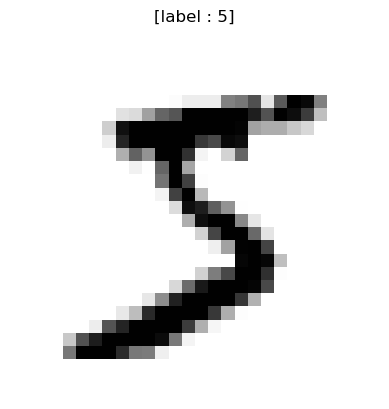

In [47]:
# 시각화

plt.imshow(raw_img,cmap='gray_r')
plt.title(f'[label : {labels[0]}]')
plt.axis('off')
plt.show()